In [1]:
!pip install deap

In [2]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tsp
import elitism

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
TSP_NAME = "bayg29" 
tsp = tsp.TravelingSalesmanProblem(TSP_NAME)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
POPULATION_SIZE = 300
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9
P_MUTATION = 0.1 

In [0]:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))
toolbox.register("evaluate", tpsDistance)

In [5]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

best = hof.items[0]
print("Best Ever Individual = ", best)
print("Best Ever Fitness = ", best.fitness.values[0])

Best Ever Individual =  array('i', [0, 23, 12, 15, 26, 7, 22, 6, 24, 18, 10, 21, 16, 13, 17, 14, 3, 9, 19, 1, 20, 4, 28, 2, 25, 8, 11, 5, 27])
Best Ever Fitness =  9074.146484375


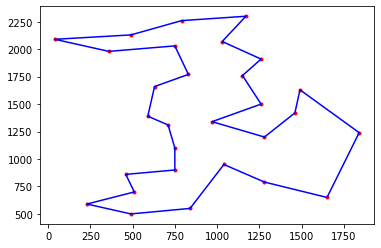

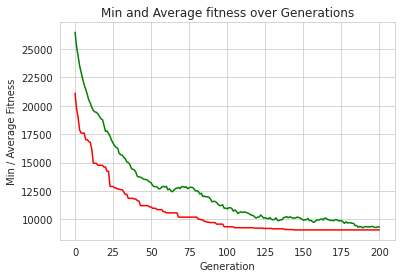

In [6]:
plt.figure(1)
tsp.plotData(best)

minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

plt.show()